# Nifty50 Closing Price Prediction using ML

* Model: Stacked LSTM
* Dataset: Nifty50 from Yahoo Fianance

## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./dataset/NIFTY50.csv')
df.index = pd.to_datetime(df['Date']).dt.date

df.drop(['Date', 'Adj Close'], axis='columns', inplace=True)
display(df.head())
display(df.tail())

,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805


,Open,High,Low,Close
Date,,,,
2021-04-26,14449.45020,14557.50000,14421.29981,14485.00000
2021-04-27,14493.79981,14667.54981,14484.84961,14653.04981
2021-04-28,14710.50000,14890.25000,14694.95020,14864.54981
2021-04-29,14979.00000,15044.34961,14814.45020,14894.90039
2021-04-30,14747.34961,14855.45020,14601.70020,14631.09961


In [3]:
print(f'Dataset Shape: {df.shape}\n')
display(df.info())

Dataset Shape: (3326, 4)

<class 'pandas.core.frame.DataFrame'>
Index: 3326 entries, 2007-09-17 to 2021-04-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3326 non-null   float64
 1   High    3326 non-null   float64
 2   Low     3326 non-null   float64
 3   Close   3326 non-null   float64
dtypes: float64(4)
memory usage: 129.9+ KB


None

In [4]:
window_len = 14
feature = 'Close'

## Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=False)

In [6]:
df_train.head()

,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805


In [7]:
df_test.head()

,Open,High,Low,Close
Date,,,,
2018-08-07,11423.15039,11428.95020,11359.70020,11389.4502
2018-08-08,11412.50000,11459.95020,11379.29981,11450.0000
2018-08-09,11493.25000,11495.20020,11454.09961,11470.7002
2018-08-10,11474.95020,11478.75000,11419.65039,11429.5000
2018-08-13,11369.59961,11406.29981,11340.29981,11355.7500


## Plotting Closing Prices

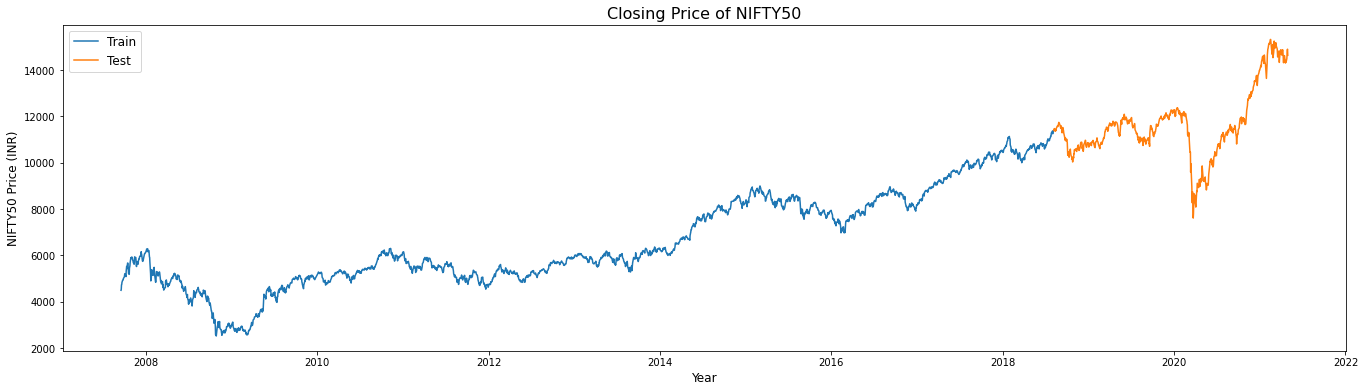

In [8]:
fig, ax = plt.subplots(figsize=(23, 6))
ax.plot(df_train[feature], label='Train')
ax.plot(df_test[feature], label='Test')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('NIFTY50 Price (INR)', fontsize=12)
ax.set_title('Closing Price of NIFTY50', fontsize=16)
ax.legend(fontsize=12)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

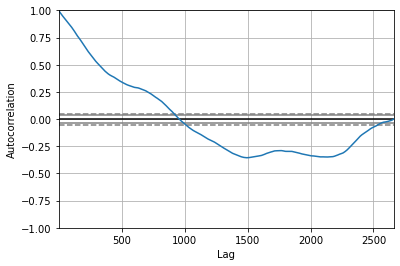

In [9]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_train[feature].values)

## Data Preprocessing

In [10]:
train = np.array(df_train[feature]).reshape(-1, 1)
test  = np.array(df_test [feature]).reshape(-1, 1)

## Building the ARIMA Model

* History will contain original train set, but with each iteration we will add one datapoint
from the test set as we continue prediction

In [12]:
from statsmodels.tsa.arima.model import ARIMA

history = list(train)
order_predictions = []

for i in range(len(test)):
    model = ARIMA(history, order=(2 ,2 ,0)) # defining ARIMA model
    model_fit = model.fit() # fitting model
    y_hat = model_fit.forecast() # predicting 'return'

    order_predictions.append(y_hat[0])
    history.append(test[i])
    print('Prediction: {} of {}'.format(i+1,len(test)), end='\r')

## Testing the model

### Mean Error

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

error = mean_squared_error(test, order_predictions, squared=False)
print('Test MSE: %.3f' % error)

accuracy = r2_score(test, order_predictions)
print(f'Test Accuracy: {round(100*r2_score(test, order_predictions), 2)}%')

Test MSE: 177.296
Test Accuracy: 98.54%


## Plotting Prediction vs Reality

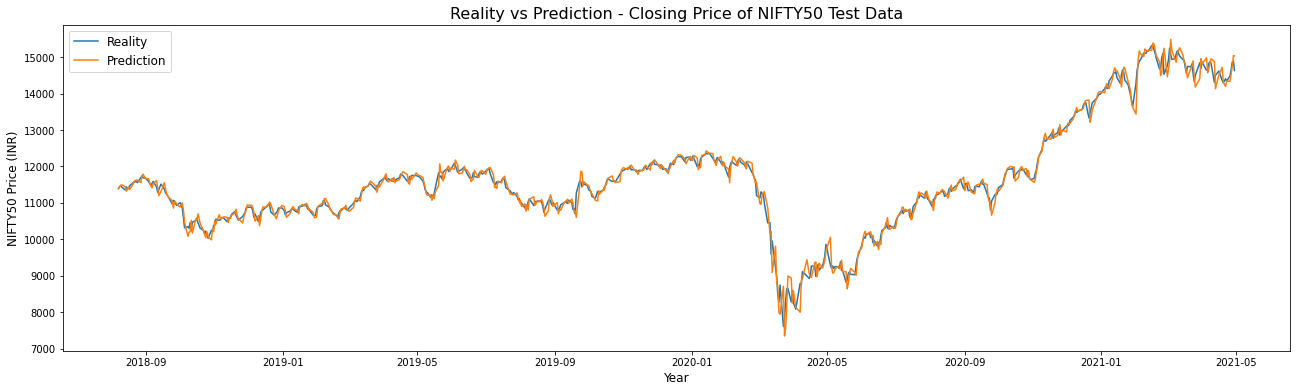

In [14]:
fig, ax = plt.subplots(figsize=(22, 6))

ax.plot(df_test[feature].index, test, label='Reality')
ax.plot(df_test[feature].index, order_predictions, label='Prediction')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('NIFTY50 Price (INR)', fontsize=12)
ax.set_title('Reality vs Prediction - Closing Price of NIFTY50 Test Data', fontsize=16)
ax.legend(fontsize=12)